# NumPy Basics: Arrays and Vectorized Computation

NumPy was designed for efficiency on large arrays of data
- Written in C
- stores data in a contiguous memory block, independent of other Python objects
- NumPy's algorithms operate on this memory without any overhead
- Operations are performed on entire arrays without `for` loops
- NumPy-based algorithms are generally 10 to 100 times faster than their Python counterparts and use significantly less memory

Examples of NumPy vs. standard Python list:

In [2]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [3]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 12.1 ms, sys: 5.72 ms, total: 17.8 ms
Wall time: 21.5 ms
CPU times: user 575 ms, sys: 163 ms, total: 737 ms
Wall time: 775 ms


## The NumPy ndarray: A Multidimensional Array Object

The ndarray is a fast, flexible container for large datasets in Python and enables you to perform mathematical operations on whole blocks of data.

In [4]:
import numpy as np
# Generate some random data
data = np.random.randn(2, 3)
data

array([[-0.2047,  0.4789, -0.5194],
       [-0.5557,  1.9658,  1.3934]])

Write mathematical operations with `data`:

In [5]:
data * 10
data + data

array([[-0.4094,  0.9579, -1.0389],
       [-1.1115,  3.9316,  2.7868]])

The data has to be homogeneous, i.e. all elements must be the **same type**.

Every array has a `shape` which is a tuple with the size of each dimension:

In [9]:
data.shape

(2, 3)

The `dtype` describes the data type of the array:

In [8]:
data.dtype

dtype('float64')

### Creating ndarrays

Easiest way to create arrays: `array` function

In [10]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

Nested sequences will be converted into a multidimensional array:

In [11]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [13]:
arr2.ndim

2

In [14]:
arr2.shape

(2, 4)

`np.array` tries to infer a good data type unless explicitly specified

In [15]:
arr1.dtype

dtype('float64')

In [16]:
arr2.dtype

dtype('int64')

Other functions to create new arrays:

In [17]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

To create a higher dimensional array, pass a tuple for the shape:

In [20]:
np.zeros((3, 6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [133]:
np.ones((3, 6))

array([[ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.]])

`empty` creates an array without initializing its values.

In [19]:
np.empty((2, 3, 2))

array([[[ -2.3158e+077,  -2.3204e+077],
        [  2.9644e-323,   0.0000e+000],
        [  2.1432e-312,   4.4703e-038]],

       [[  5.8923e-091,   3.2748e+179],
        [  3.5714e-062,   5.0291e-037],
        [  3.9991e+252,   9.0384e-309]]])

`arange` is an array-valued version of the built-in Python `range` function:

In [21]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Data Types for ndarrays

`dtype` is required by the ndarray to interpret a chunk of memory as a particular type of data:

In [5]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype

dtype('float64')

In [6]:
arr2.dtype

dtype('int32')

The numerical dtypes are named the same way: a type name, like `float` or `int`, followed by a number indicating the number of bits per element. A standard doubleprecision floating-point value (what’s used under the hood in Python’s float object) takes up 8 bytes or 64 bits. Thus, this type is known in NumPy as `float64`. 

Explicitly convert (or _cast_) an array from one dtype to another with `astype`:

In [10]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [11]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

When floating-point numbers are casted to be of integer dtype, the decimal part will be truncated, **not** rounded:

In [13]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([  3.7,  -1.2,  -2.6,   0.5,  12.9,  10.1])

In [14]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

Convert an array of strings representing numbers to numeric form:

In [15]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([  1.25,  -9.6 ,  42.  ])

_It’s important to be cautious when using the `numpy.string_` type, as string data in NumPy is fixed size and may truncate input without warning. `pandas` has more intuitive out-of-the-box behavior on non-numeric data._

Use another array's dtype attribute:

In [18]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

Shorthand type code strings that can be used to refer to a dtype:

In [19]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([1, 0, 1, 0, 1, 0, 0, 0], dtype=uint32)

Note that calling `astype` always creates a **new array (a copy of the data)**, even if the new `dtype` is the same as the old `dtype`. This might use a lot of memory if you are working with a lot of data.

### Arithmetic with NumPy Arrays

Batch operations without `for` loops = vectorization

Arithmetic operations between equal-size arrays apply the operation element-wise:

In [20]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [21]:
arr * arr

array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.]])

In [22]:
arr - arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

Arithmetic operations with scalars propagate the scalar argument to each element in the array:

In [23]:
1 / arr

array([[ 1.    ,  0.5   ,  0.3333],
       [ 0.25  ,  0.2   ,  0.1667]])

In [24]:
arr ** 0.5

array([[ 1.    ,  1.4142,  1.7321],
       [ 2.    ,  2.2361,  2.4495]])

Comparisons between arrays of the same size yield boolean arrays:

In [25]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[  0.,   4.,   1.],
       [  7.,   2.,  12.]])

In [26]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]], dtype=bool)

Operations between differently sized arrays = broadcasting (see Appendix A)

### Basic Indexing and Slicing

One-dimensional arrays act (on the surface) similarly to Python lists

In [29]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
arr[5]

5

In [31]:
arr[5:8]

array([5, 6, 7])

Array slices are _views_ on the original array. The data is not copied, so any modification of the slice will be applied to the source array.

In [32]:
arr[5:8] = 12

In [33]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [34]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [35]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,     9])

"Bare" slice `[:]` will assign to all values in an array:

In [36]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

_If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array—for example, `arr[5:8].copy()`._

#### Higher-dimensional arrays

In two-dimensional arrays, the elements at each index are one-dimensional arrays:

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # 3x3 array

Get element at index 2

In [80]:
arr2d[2]

array([7, 8, 9])

Pass a comma-separated list of indices to select individual elements. The following two are equivalent:

In [39]:
arr2d[0][2]

3

In [40]:
arr2d[0, 2]

3

Axis 0 = "rows", axis 1 = "columns"

In multidimensional arrays, when omitting later indices, a lower dimensional ndarray will be returned consisting of all data along the higher dimensions.

So in the 2x2x3 array `arr3d`:

In [41]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [42]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [43]:
arr3d[1]

array([[ 7,  8,  9],
       [10, 11, 12]])

Both scalar values and arrays can be assigned to `arr3d[0]`:

In [46]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [47]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Get all values whose indices start with (1,0), forming a 1-dimensional array:

In [48]:
arr3d[1, 0]

array([7, 8, 9])

Same as indexing in two steps:

In [49]:
x = arr3d[1]
x
x[0]

array([7, 8, 9])

#### Indexing with slices

Like one-dimensional objects such as Python lists:

In [50]:
arr
arr[1:6]

array([ 1,  2,  3,  4, 64])

Slicing a 2-dimensional array is a bit different:

In [81]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [82]:
arr2d[:2] # first two rows

array([[1, 2, 3],
       [4, 5, 6]])

It has sliced along axis 0 (first axis) - a slice selects a range of elements along an axis ("select the first two rows of arr2d")

Passing of multiple slices:

In [53]:
arr2d[:2, 1:] # first two rows, last two columns

array([[2, 3],
       [5, 6]])

That way you obtain array views of the same number of dimensions.

You get lower dimensional slides by mixing integer indexes and slices:

In [54]:
arr2d[1, :2] # second row, second column

array([4, 5])

In [55]:
arr2d[:2, 2] # first two rows, third column

array([3, 6])

The colon by itself means to take the entire axis. Slice only higher dimensional axes by doing:

In [58]:
arr2d[:, :1] # all rows, first column

array([[1],
       [4],
       [7]])

Assigning to a slice expression assigns to the whole section:

In [70]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

In [79]:
arr2d[:2, 1:] # shape = (2,2). :2 = first two rows, 1: = last two columns

array([[0, 0],
       [0, 0]])

In [68]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

_This section is confusing, it is hard to grasp the slicing across dimensions_

### Boolean Indexing

Generate array of names with duplicates & random normally distributed data:

In [4]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [5]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'],
      dtype='<U4')

In [6]:
data

array([[ 0.0009,  1.3438, -0.7135, -0.8312],
       [-2.3702, -1.8608, -0.8608,  0.5601],
       [-1.2659,  0.1198, -1.0635,  0.3329],
       [-2.3594, -0.1995, -1.542 , -0.9707],
       [-1.307 ,  0.2863,  0.378 , -0.7539],
       [ 0.3313,  1.3497,  0.0699,  0.2467],
       [-0.0119,  1.0048,  1.3272, -0.9193]])

Select all rows with name `'Bob'`

In [7]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

Pass this boolean array when indexing the array. This only works if the boolean array has the same length as the array axis it is indexing. It is even possible to mix and match boolean arrays with slices or integers. 

_Note that boolean selection won't fail if the boolean array has not the correct length, so be careful with this feature_

In [9]:
data[names == 'Bob']

array([[ 0.0009,  1.3438, -0.7135, -0.8312],
       [-2.3594, -0.1995, -1.542 , -0.9707]])

Select from the rows where `names == 'Bob'` and index columns, too:

In [10]:
data[names == 'Bob', 2:]

array([[-0.7135, -0.8312],
       [-1.542 , -0.9707]])

In [11]:
data[names == 'Bob', 3]

array([-0.8312, -0.9707])

Select everything but `'Bob'`

In [13]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True], dtype=bool)

In [14]:
data[~(names == 'Bob')]

array([[-2.3702, -1.8608, -0.8608,  0.5601],
       [-1.2659,  0.1198, -1.0635,  0.3329],
       [-1.307 ,  0.2863,  0.378 , -0.7539],
       [ 0.3313,  1.3497,  0.0699,  0.2467],
       [-0.0119,  1.0048,  1.3272, -0.9193]])

The `~` can be used to invert a general condition:

In [15]:
cond = names == 'Bob'
data[~cond]

array([[-2.3702, -1.8608, -0.8608,  0.5601],
       [-1.2659,  0.1198, -1.0635,  0.3329],
       [-1.307 ,  0.2863,  0.378 , -0.7539],
       [ 0.3313,  1.3497,  0.0699,  0.2467],
       [-0.0119,  1.0048,  1.3272, -0.9193]])

Selecting two of the names to combine multiple boolean conditions, use boolean arithmetic operators like `&` (and) and `|` (or) (Python keywords `and` and `or` do not work with boolean arrays)

In [16]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False], dtype=bool)

In [17]:
data[mask]

array([[ 0.0009,  1.3438, -0.7135, -0.8312],
       [-1.2659,  0.1198, -1.0635,  0.3329],
       [-2.3594, -0.1995, -1.542 , -0.9707],
       [-1.307 ,  0.2863,  0.378 , -0.7539]])

Selecting data from an array by boolean indexing always creates a copy of the data

Set all negative values in `data` to 0:

In [18]:
data[data < 0] = 0
data

array([[ 0.0009,  1.3438,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.5601],
       [ 0.    ,  0.1198,  0.    ,  0.3329],
       [ 0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.2863,  0.378 ,  0.    ],
       [ 0.3313,  1.3497,  0.0699,  0.2467],
       [ 0.    ,  1.0048,  1.3272,  0.    ]])

Set whole rows or columns with a one-dimensional boolean array:

In [19]:
data[names != 'Joe'] = 7
data

array([[ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 0.    ,  0.    ,  0.    ,  0.5601],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 0.3313,  1.3497,  0.0699,  0.2467],
       [ 0.    ,  1.0048,  1.3272,  0.    ]])

These types of operations are convenient to do with `pandas`

### Fancy Indexing

Indexing using integer arrays

In [20]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

To select a subset of the rows in a particular order, pass a list or ndarray of integers specifying the desired order:

In [21]:
arr[[4, 3, 0, 6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

Negative indices select rows from the end:

In [22]:
arr[[-3, -5, -7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

Passing multiple index arrays selects a one-dimensional array of elements corresponding to each tuple of indices:

In [23]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [24]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

Regardless of how many dimensions the array has, fancy indexing always results in a one-dimensional result

Selecting a subset of the matrix's rows and columns:

In [26]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Fancy indexing (unlike slicing) always makes a copy of the data into a new array

### Transposing Arrays and Swapping Axes

Transposing returns a view on the underlying data without copying anything (using `transpose` and the special `.T` attribute)

In [135]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [28]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

You maybe do this very often when doing matrix computations, e.g. when computing the inner matrix product using `np.dot`

In [31]:
arr = np.random.randn(6, 3)
arr

array([[ 1.0015, -0.5031, -0.6223],
       [-0.9212, -0.7262,  0.2229],
       [ 0.0513, -1.1577,  0.8167],
       [ 0.4336,  1.0107,  1.8249],
       [-0.9975,  0.8506, -0.1316],
       [ 0.9124,  0.1882,  2.1695]])

In [32]:
np.dot(arr.T, arr)

array([[ 3.8698, -0.1328,  2.1153],
       [-0.1328,  3.9013,  1.3465],
       [ 2.1153,  1.3465,  9.158 ]])

For higher dimensional arrays, `transpose` will accept a tuple of axis numbers to permute the axes:

In [136]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

This reorders the axes with the second axis first, the first axis second, and the last axis unchanged:

In [34]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

ndarray has the method `swapaxes` which takes a pair of axis numbers and switches the indicated axes to rearrange the data (not making a copy)

In [140]:
print("Original array: \n", arr)
print("\nSwapped axes: \n", arr.swapaxes(1, 2))

Original array: 
 [[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]

Swapped axes: 
 [[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]

 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]


## Universal Functions: Fast Element-Wise Array Functions

Universal function = `ufunc`, performs element-wise operations on data in ndarrays. Many ufuncs are simple element-wise transformations, like `sqrt` or `exp` (_unary_ ufuncs):

In [36]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
np.sqrt(arr)

array([ 0.    ,  1.    ,  1.4142,  1.7321,  2.    ,  2.2361,  2.4495,
        2.6458,  2.8284,  3.    ])

In [38]:
np.exp(arr)

array([    1.    ,     2.7183,     7.3891,    20.0855,    54.5982,
         148.4132,   403.4288,  1096.6332,  2980.958 ,  8103.0839])

`add` or `maximum` take two arrays (_binary_ ufuncs) and return a single array as the result:

In [141]:
x = np.random.randn(8)
y = np.random.randn(8)
print(x)
print(y)

[-1.307   0.4995  1.0793  1.1525 -1.0305 -0.2168  0.6172  0.7789]
[ 0.8506  0.239   0.879  -1.3704 -0.544  -0.7909  0.2041 -0.5366]


In [41]:
np.maximum(x, y)

array([-0.1149,  2.0037,  0.0296,  0.7953,  0.1181, -0.0363,  1.0954,
        0.9809])

ufuncs can return multiple arrays, e.g. `modf` 
- returns two arrays: one with decimal parts and the other with the integral parts of a floating-point array

In [43]:
arr = np.random.randn(7) * 5
arr

array([ -2.0141,   1.1024,  -0.967 ,   3.3458,  -8.2449, -11.264 ,  -5.8342])

In [44]:
remainder, whole_part = np.modf(arr)
remainder

array([-0.0141,  0.1024, -0.967 ,  0.3458, -0.2449, -0.264 , -0.8342])

In [45]:
whole_part

array([ -2.,   1.,  -0.,   3.,  -8., -11.,  -5.])

Ufuncs accept an optional `out` argument to operate in-place on arrays:

In [46]:
arr

array([ -2.0141,   1.1024,  -0.967 ,   3.3458,  -8.2449, -11.264 ,  -5.8342])

In [47]:
np.sqrt(arr)

/Users/verenakutschera/miniconda3/envs/pydata-book/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([    nan,  1.05  ,     nan,  1.8292,     nan,     nan,     nan])

In [48]:
np.sqrt(arr, arr)

/Users/verenakutschera/miniconda3/envs/pydata-book/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([    nan,  1.05  ,     nan,  1.8292,     nan,     nan,     nan])

In [49]:
arr

array([    nan,  1.05  ,     nan,  1.8292,     nan,     nan,     nan])

## Array-Oriented Programming with Arrays

By using NumPy arrays, loops can be avoided. This kind of operations are referred to as _vectorization_ and are often much faster than their Python equivalents.

Evaluate function `sqrt(x^2 + y^2)` with the `np.meshgrid` function:

In [143]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points) # meshgrid takes two 1D arrays and produces two 2D matrices
print(xs)
print(ys)

[[-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]
 ..., 
 [-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]]
[[-5.   -5.   -5.   ..., -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ..., -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ..., -4.98 -4.98 -4.98]
 ..., 
 [ 4.97  4.97  4.97 ...,  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...,  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...,  4.99  4.99  4.99]]


In [52]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[ 7.0711,  7.064 ,  7.0569, ...,  7.0499,  7.0569,  7.064 ],
       [ 7.064 ,  7.0569,  7.0499, ...,  7.0428,  7.0499,  7.0569],
       [ 7.0569,  7.0499,  7.0428, ...,  7.0357,  7.0428,  7.0499],
       ..., 
       [ 7.0499,  7.0428,  7.0357, ...,  7.0286,  7.0357,  7.0428],
       [ 7.0569,  7.0499,  7.0428, ...,  7.0357,  7.0428,  7.0499],
       [ 7.064 ,  7.0569,  7.0499, ...,  7.0428,  7.0499,  7.0569]])

Visualize this two-dimensional array with `matplotlib` and `imshow`:

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

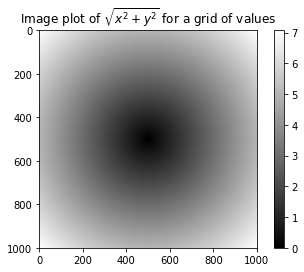

In [53]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [ ]:
plt.draw()

In [ ]:
plt.close('all')

### Expressing Conditional Logic as Array Operations

`np.where(cond, x, y)` is a vectorized version of `x if condition else y`

`x` and `y` can be arrays or scalars

In [54]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Take a value from `xarr` whenever the corresponding value in `cond` is `True`, otherwise take the value from `yarr`:

Python solution:

In [55]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

- Problems: not very fast for large arrays, won't work with multidimensional arrays. 

Solution with `np.where`:

In [56]:
result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

Second and third arguments don't need to be arrays, they can be scalars

Typical use: produce a new array of values based on another array.

Example: replace all positive values with 2 and all negative values with -2 in a matrix of randomly generated data

In [64]:
arr = np.random.randn(4, 4)
arr

array([[ 2.2247, -0.6794,  0.7274, -0.8687],
       [-1.2139, -0.4706, -0.9192, -0.8388],
       [ 0.4352, -0.5578, -0.5675, -0.3726],
       [-0.9266,  1.7551,  1.2098,  1.27  ]])

In [65]:
arr > 0

array([[ True, False,  True, False],
       [False, False, False, False],
       [ True, False, False, False],
       [False,  True,  True,  True]], dtype=bool)

In [66]:
np.where(arr > 0, 2, -2)

array([[ 2, -2,  2, -2],
       [-2, -2, -2, -2],
       [ 2, -2, -2, -2],
       [-2,  2,  2,  2]])

Combination of scalars and arrays, e.g. replace all positive values with 2:

In [68]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.    , -0.6794,  2.    , -0.8687],
       [-1.2139, -0.4706, -0.9192, -0.8388],
       [ 2.    , -0.5578, -0.5675, -0.3726],
       [-0.9266,  2.    ,  2.    ,  2.    ]])

### Mathematical and Statistical Methods

Statistics for an entire array or the data along an axis
- Aggregations (or reductions) like `sum`, `mean`, `std`
- Array instance method or using top-level NumPy functions

Call the array instance method, e.g. `arr.mean()` or with the top-level NumPy function `np.mean(arr)`

In [69]:
arr = np.random.randn(5, 4) # normally distributed random data
arr

array([[-0.9744, -0.6347, -0.3957, -0.2894],
       [-0.7343, -0.7285,  0.8388,  0.2669],
       [ 0.7212,  0.911 , -1.0209, -1.4134],
       [ 1.2966,  0.2523,  1.1275, -0.5684],
       [ 0.3094, -0.5774, -1.1686, -0.825 ]])

In [71]:
arr.mean()

-0.18035879062567667

In [72]:
np.mean(arr)

-0.18035879062567667

In [73]:
arr.sum()

-3.6071758125135331

`mean` and `sum` take an optional `axis` argument:

In [74]:
arr.mean(axis=1) # mean across the columns

array([-0.5736, -0.0893, -0.2005,  0.527 , -0.5654])

In [75]:
arr.sum(axis=0) # sum down the rows

array([ 0.6185, -0.7773, -0.619 , -2.8293])

`cumsum` and `cumprod` do not aggregate but produce an array of the intermediate results:

In [76]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In multidimensional arrays, accumulation functions return an array of the same size, but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:

In [77]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [78]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [79]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### Methods for Boolean Arrays

`sum` is often used to count `True` values in a boolean array:

In [80]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

43

`any` tests whether one or more values is `True` and `all` checks if every value is `True`. They work also with non-boolean arrays where non-zero elements = `True`.

In [82]:
bools = np.array([False, False, True, False])
bools.any()

True

In [83]:
bools.all()

False

### Sorting

In place with `sort`:

In [84]:
arr = np.random.randn(6)
arr

array([ 1.3233, -2.2646, -0.915 , -0.479 ,  1.0472,  0.9239])

In [85]:
arr.sort()
arr

array([-2.2646, -0.915 , -0.479 ,  0.9239,  1.0472,  1.3233])

Sort each one-dimensional section of values by passing the axis number to `sort`:

In [86]:
arr = np.random.randn(5, 3)
arr

array([[-0.1142,  0.4058,  0.2885],
       [-0.4348,  0.3588, -0.3882],
       [ 2.1287,  1.4096, -0.1054],
       [ 0.7004,  2.0929, -0.137 ],
       [-0.9305,  0.3275,  1.303 ]])

In [87]:
arr.sort(1)
arr

array([[-0.1142,  0.2885,  0.4058],
       [-0.4348, -0.3882,  0.3588],
       [-0.1054,  1.4096,  2.1287],
       [-0.137 ,  0.7004,  2.0929],
       [-0.9305,  0.3275,  1.303 ]])

`np.sort` returns a sorted copy of an array.

Compute quantiles by sorting it and selecting the value at a particular rank:

In [88]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.5311513550102103

### Unique and Other Set Logic

Basic set operations for one-dimensional arrays:
`np.unique` returns sorted unique values

In [89]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'],
      dtype='<U4')

In [90]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

Pure Python alternative:

In [91]:
sorted(set(names))

['Bob', 'Joe', 'Will']

`np.in1d` tests membership of the values in one array in another, returns a boolean array:

In [92]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

## File Input and Output with Arrays

Save and load data to and from disk in text or binary format. Most users will prefer pandas and other tools for text and tabular data, so here only binary format is shown:

`np.save` saves arrays by default in an uncompressed raw binary format (extension _.npy_):

In [95]:
arr = np.arange(10)
np.save('some_array', arr)

`np.load` is used to load arrays from disk:

In [96]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Save multiple arrays in an uncompressed archive using `np.savez`, passing arrays as keyword arguments:

In [97]:
np.savez('array_archive.npz', a=arr, b=arr)

When loading an _.npz_ file, you get back a dict-like object that loads the individual arrays lazily:

In [98]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

For data that compresses well, use `np.savez_compressed` instead:

In [99]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [100]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

## Linear Algebra

- e.g. matrix multiplication, decompositions, determinants and other square matrix math
- multiplying two two-dimensional arrays with * is an element-wise product instead of a matrix dot product
- the function `dot` is an array method and a function in the `numpy` name space

In [101]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [102]:
y

array([[  6.,  23.],
       [ -1.,   7.],
       [  8.,   9.]])

In [103]:
x.dot(y)

array([[  28.,   64.],
       [  67.,  181.]])

`x.dot(y)` is equivalent to `np.dot(x, y)`:

In [104]:
np.dot(x, y)

array([[  28.,   64.],
       [  67.,  181.]])

A matrix product between a two-dimensional array and a suitably sized one-dimensional array results in a one-dimensional array:

In [106]:
np.ones(3)

array([ 1.,  1.,  1.])

In [107]:
x

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [105]:
np.dot(x, np.ones(3))

array([  6.,  15.])

The `@` symbol (from Python 3.5 on) also works as an infix operator that performs matrix multiplication:

In [108]:
x @ np.ones(3)

array([  6.,  15.])

`np.linalg` has a standard set of matrix decompositions and things like inverse and determinant:

In [110]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X) # computes the dot product of X with its transpose X.T
mat

array([[ 4.8243, -2.2127,  1.6057, -4.7687, -0.8716],
       [-2.2127,  2.8726, -2.3659,  1.4924,  1.0808],
       [ 1.6057, -2.3659,  2.7693, -1.4178, -1.6219],
       [-4.7687,  1.4924, -1.4178,  5.3958,  1.3691],
       [-0.8716,  1.0808, -1.6219,  1.3691,  2.9136]])

Examples from commonly used methods: 
- `eig`: Compute eigenvalues and eigenvectors of a square matrix (no example shown)
- `inv`: Compute inverse of a square matrix

In [145]:
inv(mat)

array([[ 12.9553,   8.5353,   4.0392,  10.6722,  -2.0569],
       [  8.5353,   6.9141,   3.8447,   6.927 ,  -1.1262],
       [  4.0392,   3.8447,   2.9077,   3.3096,  -0.1544],
       [ 10.6722,   6.927 ,   3.3096,   9.0211,  -1.7736],
       [ -2.0569,  -1.1262,  -0.1544,  -1.7736,   0.8931]])

In [112]:
mat.dot(inv(mat))

array([[ 1.,  0.,  0.,  0., -0.],
       [ 0.,  1., -0.,  0.,  0.],
       [-0.,  0.,  1.,  0., -0.],
       [ 0., -0.,  0.,  1.,  0.],
       [-0., -0., -0., -0.,  1.]])

In [113]:
q, r = qr(mat)
r

array([[-7.3654,  3.9223, -3.4762,  7.5364,  2.4804],
       [ 0.    , -2.5993,  2.7451,  0.7057, -1.6673],
       [ 0.    ,  0.    , -0.9307,  0.7787,  2.0584],
       [ 0.    ,  0.    ,  0.    , -0.2539, -1.2834],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.325 ]])

## Pseudorandom Number Generation

`np.random` has functions to efficiently generate whole arrays of sample values from many kinds of probability distributions

In [114]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 1.7205, -0.1717, -0.8278,  0.3705],
       [-0.6742, -1.7123, -0.7382,  0.3918],
       [ 1.7634, -0.0546, -0.6565, -1.5501],
       [-0.0443,  0.6815, -0.9537, -1.857 ]])

Python's `random` module only samples one value at a time, so `np.random` is much faster:

In [115]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

580 ms ± 32.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
28.7 ms ± 964 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


These are _pseudorandom_ numbers because they are generated by an algorithm with deterministic behavior based on a _seed_ of the random number generator.

Change NumPy's random number generation seed with `np.random.seed`:

In [116]:
np.random.seed(1234)

The data generation functions in `np.random` use a global random seed. Use `np.random.RandomState` to create a random number generator isolated from others:

In [117]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.4714, -1.191 ,  1.4327, -0.3127, -0.7206,  0.8872,  0.8596,
       -0.6365,  0.0157, -2.2427])

## Example: Random Walks

Random walk = mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

Illustrative application:
- simple random walk starting at 0 with steps of 1 and -1 occurring with equal probability

Pure Python way to implement that:

In [118]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [119]:
plt.figure()

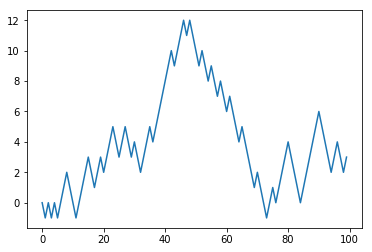

In [120]:
plt.plot(walk[:100])

`walk` is simply the cumulative sum of the random steps

Use instead the `np.random` module to draw 1000 coin flips at once, set them to 1 and -1 and compute the cumulative sum:

In [121]:
np.random.seed(12345)

In [146]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps) # Return random integers from the "discrete uniform" distribution in the interval 0-2
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

Extract statistics like minimum and maximum value:

In [147]:
walk.min()

-54

In [148]:
walk.max()

2

_First crossing time_ = the step at which the random walk reaches a particular value

How long did it take the random walk to get at least 10 steps away from the origin 0 in either direction? `np.abs(walk) >= 10` gives us a boolean array indicating where the walk has reached or exceeded 10, but we want the index of the _first_ 10 or -10. `argmax` returns the first index of the maximum value in the boolean array (`True` is the maximum value):

In [149]:
(np.abs(walk) >= 10).argmax()

33

Note that `argmax` is not always efficient because it makes a full scan of the array

### Simulating Many Random Walks at Once

You can simulate 5000 random walks with minor modifications to the above code.

With a 2-tuple, `np.random` will generate a two-dimensional array of draws and we can compute the cumulative sum across the rows to compute all 5000 random walks in one shot:

In [126]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ..., 
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

Now, compute maximum and minimum values from all the walks:

In [127]:
walks.max()

138

In [128]:
walks.min()

-133

Compute minimum crossing time to 30 or -30. Not all 5000 of them reach 30, so check first with `any`:

In [129]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True, False, ..., False,  True, False], dtype=bool)

In [130]:
hits30.sum() # Number that hit 30 or -30

3410

Select out the rows of walks that actually cross 30 and call `argmax` across axis 1 to get the crossing times:

In [131]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.88973607038122

Experiment with other distributions for the steps, using e.g. `normal`:

In [132]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))